In [ ]:
!pip install lightning
!pip install pygments
!pip install transformers
!pip install datasets
!pip install huggingface-hub

That's it!

In [ ]:
from transformers import pipeline
pipe = pipeline("object-detection", model="valentinafeve/yolos-fashionpedia")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [ ]:
# creating pipeline
path = '/content/Screenshot 2024-07-15 095455.png'
final = pipe(path)
#print(final)
detection = []
for i in final:
  if i['score'] > 0.80:
    detection.append(i)
print(detection)

[{'score': 0.9890130758285522, 'label': 'neckline', 'box': {'xmin': 201, 'ymin': 164, 'xmax': 304, 'ymax': 189}}, {'score': 0.948689341545105, 'label': 'hat', 'box': {'xmin': 184, 'ymin': 9, 'xmax': 340, 'ymax': 122}}, {'score': 0.9906519651412964, 'label': 'shoe', 'box': {'xmin': 228, 'ymin': 634, 'xmax': 294, 'ymax': 780}}, {'score': 0.9225594401359558, 'label': 'hat', 'box': {'xmin': 182, 'ymin': 17, 'xmax': 339, 'ymax': 71}}, {'score': 0.8026004433631897, 'label': 'shorts', 'box': {'xmin': 175, 'ymin': 264, 'xmax': 342, 'ymax': 393}}, {'score': 0.8899008631706238, 'label': 'bag, wallet', 'box': {'xmin': 122, 'ymin': 400, 'xmax': 211, 'ymax': 555}}]


In [ ]:
box=[]
for i in detection:
  box.append(i['box'])
print(box)

[{'xmin': 201, 'ymin': 164, 'xmax': 304, 'ymax': 189}, {'xmin': 184, 'ymin': 9, 'xmax': 340, 'ymax': 122}, {'xmin': 228, 'ymin': 634, 'xmax': 294, 'ymax': 780}, {'xmin': 182, 'ymin': 17, 'xmax': 339, 'ymax': 71}, {'xmin': 175, 'ymin': 264, 'xmax': 342, 'ymax': 393}, {'xmin': 122, 'ymin': 400, 'xmax': 211, 'ymax': 555}]


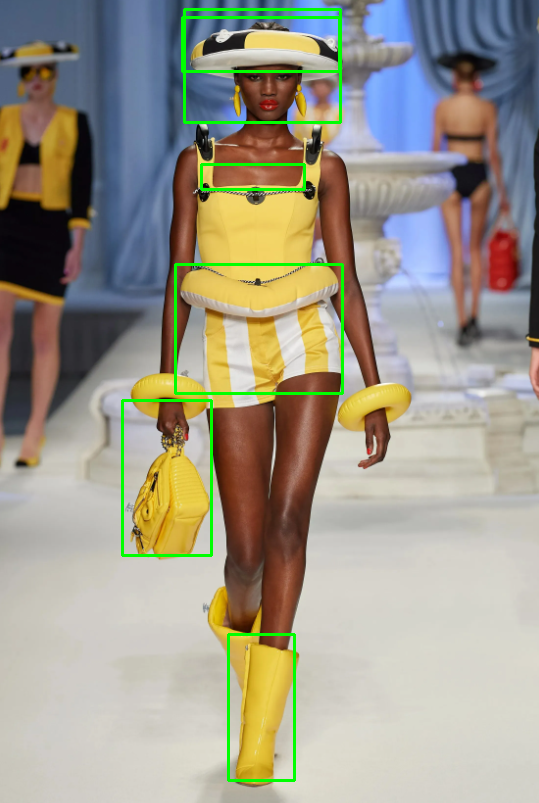

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
image = cv2.imread(path)

# Draw bounding boxes
for i in box:
    cv2.rectangle(image, (i['xmin'], i['ymin']), (i['xmax'], i['ymax']), (0, 255, 0), 2)


# Display the output
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import pandas as pd
import csv
import pandas as pd

# Create a new Pandas DataFrame
fashiondata = pd.DataFrame(columns=['label'])
newentry = []
for i in detection:
  newentry = {
      'label': i['label']
  }
  new_series = pd.Series(newentry)
  fashiondata.loc[len(fashiondata)] = newentry
  fashiondata.to_csv('Detections.csv', index=False)
print(fashiondata)


         label
0     neckline
1          hat
2         shoe
3          hat
4       shorts
5  bag, wallet


In [ ]:
import pandas as pd
from collections import Counter


clothingdata = pd.read_csv("/content/Detections.csv")
counts = Counter(clothingdata['label'])
freq = {label: count / len(clothingdata) for label, count in counts.items()}

# Predict current fashion trends based on the frequency of each clothing type
fashion_trends = sorted(freq.items(), key=lambda x: x[1], reverse=True)

print("Current Fashion Trends:")
for trend in fashion_trends:
    print(f"{trend[0]}: {trend[1]:.2f}%")

Current Fashion Trends:
hat: 0.33%
neckline: 0.17%
shoe: 0.17%
shorts: 0.17%
bag, wallet: 0.17%
